# Installed Python libraries

In [360]:
! pip install pubchempy
! pip install rdkit
! pip install pandas
! pip install scikit-learn

In [73]:
import pubchempy as pcp

def getCompounds(names):
    data = {}
    for chemical_name in names:
        compounds = pcp.get_compounds(chemical_name, 'name')
        data[chemical_name] = compounds
    return data


In [78]:
data = getCompounds(lines)

## Save object to file. It take time to load 100 chemical data from the PubChem. So we save it locally and reuse them later

In [177]:
import pickle

def save_object_to_disk(data, file_path):

    # Open the file in binary write mode and dump the object
    with open(file_path, 'wb') as file:
        pickle.dump(data, file)

        print("Object data has been serialized and saved to file.")

def load_object_from_disk(file_path):
    # Open the file in binary read mode and load the object
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        print("Object has been deserialized and loaded from file.")
        return data



In [121]:
save_object_to_disk(data, 'data.pkl')


Object data has been serialized and saved to file.


In [35]:
import pickle

# File path to load the serialized object from
file_path = 'data.pkl'

# Open the file in binary read mode and load the object
with open(file_path, 'rb') as file:
    data = pickle.load(file)

print("Object has been deserialized and loaded from file.")


Object has been deserialized and loaded from file.


In [76]:
print(len(data.items()))
for name, compounds in data.items():
    print(name, compounds)


112
5,7-Dihydroxyflavone [Compound(5281607)]
5-Hydroxy-7,4'-dimethoxyflavone [Compound(5281601)]
5-Hydroxy-7,3',4'-trimethoxyflavone [Compound(5272653)]
5-Hydroxy-7,3',4',5'-tetramethoxyflavone []
3',4',5',5,7-Pentamethoxyflavone [Compound(493376)]
Luteolin [Compound(5280445)]
3'-Methoxyluteolin []
5,3'-Dimethoxyluteolin []
Luteolin-7-O-beta-D-glucoside []
Luteolin-7-O-beta-D-galactoside []
Luteolin-5-O-beta-D-glucoside [Compound(5317471)]
Luteolin-3'-O-L-rhamnoside []
Jaceosidin [Compound(5379096)]
Jaceosidin-7-O-neohesperidoside []
Lonicerin [Compound(5282152)]
Kaempferol-3-O-beta-D-glucoside []
Apigenin-7-O-α-L-rhamnoside []
Quercetin [Compound(5280343)]
Quercetin-3-O-beta-D-glucoside [Compound(25203368)]
Quercetin-7-O-beta-D-glucoside []
Hyperoside [Compound(5281643)]
Medioresinol-7-O-beta-D-glucoside []
Medioresinol-7-O-neohesperidoside []
Flavo-yadorinin-B []
Rhoifolin [Compound(5282150)]
Rutin [Compound(5280805)]
Loganin [Compound(87691)]
7-Epiloganin []
8-Epiloganin [Compound(1

### The following compounds, we could not find them in pubchem. 
I plan to ignore them for now. I imagine there should be other ways to find the data, beyond pubchem.

In [80]:
[key for key, compounds in data.items() if len(compounds)==0]


["5-Hydroxy-7,3',4',5'-tetramethoxyflavone",
 "3'-Methoxyluteolin",
 "5,3'-Dimethoxyluteolin",
 'Luteolin-7-O-beta-D-glucoside',
 'Luteolin-7-O-beta-D-galactoside',
 "Luteolin-3'-O-L-rhamnoside",
 'Jaceosidin-7-O-neohesperidoside',
 'Kaempferol-3-O-beta-D-glucoside',
 'Apigenin-7-O-α-L-rhamnoside',
 'Quercetin-7-O-beta-D-glucoside',
 'Medioresinol-7-O-beta-D-glucoside',
 'Medioresinol-7-O-neohesperidoside',
 'Flavoyadorinin B',
 '7-Epiloganin',
 'Ketologanin',
 '7-O-Ethyl Sweroside',
 'Secologanoside-7-Methyl Ester',
 '7α-Morroniside',
 '7beta-Morroniside',
 'Dehydromorroniside',
 'Secoxyloganin 7-Butyl Ester',
 'Secologanoside A',
 'Adinoside A',
 'Stryspinoside',
 'Loniceracetalide B',
 'L-Phenylalaninosecologanin',
 '7-O-(4-beta-D-Glucopyranosyloxy-3-Methoxy Benzoyl) Secologanolic Acid',
 "6'-O-(7α-Hydroxyswerosyloxy) Loganin",
 'Lonijaposide O',
 'Lonijaposide P',
 'Lonijaposide Q',
 'Lonijaposide R',
 'Lonijaposide S',
 'Lonijaposide T',
 'Lonijaposide U',
 'Lonijaposide V',
 'Lon

# Training Data

It seems that we need to develop a "classifier" to answer yes/no: is the chemical helpful for acne? Yes samples: all 37 SMILES that we get from PubChem No samples: I need to randomly find some chemicals SMILES

## Get the known acne medicines

I search "acne" on PubChem website and found 37 medicines. PubChem allows me to download them as csv.

In [306]:
import csv

def readPubChemFromDownloadedFile(file_name):
    # Reading from a CSV file with headers
    with open(file_name, newline='') as csvfile:
        csvreader = csv.DictReader(csvfile)

        # check the fields. Get the header names
        headers = csvreader.fieldnames
        print("Headers:", headers) 

        # Check one line of data
        # for row in csvreader:
        #     print(row)
        #     break
        names = [row["cmpdname"] for row in csvreader]

        return names

# the medicine list is downloaded from pubchem after searching "acne". It is stored in a csv
acne_filename = 'PubChem_compound_text_acne.csv'

pos_cpmd_names = readPubChemFromDownloadedFile(acne_filename)
pos_cpmd_names


Headers: ['\ufeff cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity', 'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi', 'isosmiles', 'canonicalsmiles', 'inchikey', 'iupacname', 'exactmass', 'monoisotopicmass', 'charge', 'covalentunitcnt', 'isotopeatomcnt', 'totalatomstereocnt', 'definedatomstereocnt', 'undefinedatomstereocnt', 'totalbondstereocnt', 'definedbondstereocnt', 'undefinedbondstereocnt', 'pclidcnt', 'gpidcnt', 'gpfamilycnt', 'neighbortype', 'meshheadings', 'annothits', 'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg', 'annotation']


['Dexamethasone',
 'Chloramphenicol',
 'Retinol',
 'Salicylic Acid',
 'Hydrogen Sulfide',
 'Hydroquinone',
 'Benzoyl Peroxide',
 'Erythromycin',
 'Isotretinoin',
 'Methylprednisolone',
 'Tretinoin',
 'Resorcinol',
 'Azelaic Acid',
 'Thymol',
 'Alpha-Tocopherol',
 'Sulfacetamide',
 'Bithionol',
 'Dapsone',
 'Eucalyptol',
 'Fluorometholone',
 'Clindamycin',
 'Pyrithione Zinc',
 'Sulfur',
 'Adapalene',
 'Minocycline',
 'Aluminum Oxide',
 'Nitric Oxide',
 'Trifarotene',
 'Aluminum Chloride',
 'Clascoterone',
 'Tioxolone',
 'Nadifloxacin',
 'Meclocycline',
 'Zinc Oxide',
 'Mesulfen',
 'Motretinide',
 'Sulfur iodide']

In [238]:
save_object_to_disk(positive_data, 'positive_data.pkl')

Object data has been serialized and saved to file.


In [307]:
positive_compounds = [item for i in positive_data.items() for item in i[1]]

In [310]:
positive_compounds[0].to_dict()["exact_mass"]

'392.19990218'

In [341]:
def getFeaturesFromPubChem(compound):
    x_dict = compound.to_dict()
    count_keys = ['atom_stereo_count', 'bond_stereo_count', 'charge', 'complexity', 'covalent_unit_count', 'defined_atom_stereo_count', 'defined_bond_stereo_count', 
              'exact_mass', 'h_bond_acceptor_count', 'h_bond_donor_count', 
              'heavy_atom_count', 
              'isotope_atom_count', 
              'molecular_weight', 'monoisotopic_mass', 
              'rotatable_bond_count', 'tpsa', 'undefined_atom_stereo_count', 'undefined_bond_stereo_count', 
              'volume_3d', 'xlogp']
    subset_dict = {key: x_dict[key] for key in count_keys}
    #print(subset_dict["exact_mass"])

    return subset_dict
    

In [339]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors


from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

DESCRIPTOR_NAMES = [desc_name[0] for desc_name in Descriptors._descList]

def getRdkitMoleculeFromPubChemCompound(compound):
    return Chem.MolFromInchi(compound.inchi) 

def getFeaturesFromChem(molelcule, descriptor_names=DESCRIPTOR_NAMES):
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(molelcule)

    descriptor_dict = dict(zip(DESCRIPTOR_NAMES, descriptors))

    return descriptor_dict

def getFeaturesFromRdkit(compound, descriptor_names=DESCRIPTOR_NAMES):
    molecule = getRdkitMoleculeFromPubChemCompound(compound)
    
    calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
    descriptors = calculator.CalcDescriptors(molecule)

    descriptor_dict = dict(zip(descriptor_names, descriptors))
    return descriptor_dict

def getFeatures(compound):
    dict_1 = getFeaturesFromPubChem(compound);
    dict_2 = getFeaturesFromRdkit(compound, DESCRIPTOR_NAMES)
    return dict_1 | dict_2


In [342]:
feature_dict = getFeatures(positive_compounds[1])
print(len(feature_dict))
feature_dict

230


{'atom_stereo_count': 2,
 'bond_stereo_count': 0,
 'charge': 0,
 'complexity': 342,
 'covalent_unit_count': 1,
 'defined_atom_stereo_count': 2,
 'defined_bond_stereo_count': 0,
 'exact_mass': '322.0123269',
 'h_bond_acceptor_count': 5,
 'h_bond_donor_count': 3,
 'heavy_atom_count': 20,
 'isotope_atom_count': 0,
 'molecular_weight': '323.13',
 'monoisotopic_mass': '322.0123269',
 'rotatable_bond_count': 5,
 'tpsa': 115,
 'undefined_atom_stereo_count': 0,
 'undefined_bond_stereo_count': 0,
 'volume_3d': None,
 'xlogp': 1.1,
 'MaxAbsEStateIndex': 10.511390825384332,
 'MaxEStateIndex': 10.511390825384332,
 'MinAbsEStateIndex': 0.13015983245149898,
 'MinEStateIndex': -1.2702678003146979,
 'qed': 0.24239102318486783,
 'SPS': 15.15,
 'MolWt': 323.13200000000006,
 'HeavyAtomMolWt': 311.03600000000006,
 'ExactMolWt': 322.0123268439999,
 'NumValenceElectrons': 110,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.26894513311907337,
 'MinPartialCharge': -0.4946452178785763,
 'MaxAbsPartialCharge

In [273]:
ineff_file_name = "ineffective_for_acne_clean.csv"

# Open the file and read the lines into a list
with open(ineff_file_name, 'r') as file:
    lines = file.readlines()

# Strip newline characters from each line. Also remove empty lines. Also change′ to '
negative_names = [line.strip() for line in lines if line.strip()]
negative_names

['Water',
 'Glycerin',
 'Petrolatum',
 'Mineral Oil',
 'Dimethicone',
 'Ethanol',
 'Lanolin',
 'Sodium Lauryl Sulfate',
 'Methylparaben',
 'Propylparaben',
 'Isopropyl Myristate',
 'Cocoa Butter',
 'Coconut Oil',
 'Shea Butter',
 'Stearic Acid',
 'Oleic Acid',
 'Chlorhexidine',
 'Cyclopentasiloxane',
 'Polyethylene Glycol',
 'Triclosan',
 'Benzyl Alcohol',
 'Carbomer',
 'Cetyl Alcohol',
 'Cetearyl Alcohol',
 'Propylene Glycol',
 'Triethanolamine',
 'Paraffin',
 'Isopropyl Palmitate',
 'Octyl Stearate',
 'Butylene Glycol',
 'Phenoxyethanol',
 'Polysorbate 20',
 'Polysorbate 80',
 'Stearyl Alcohol',
 'Myristyl Myristate',
 'Sorbitan Oleate',
 'Sorbitan Stearate',
 'Lauric Acid',
 'Caprylic/Capric Triglyceride',
 'Beeswax',
 'Squalane',
 'Ceteareth-20',
 'Sodium Chloride',
 'PEG-40 Hydrogenated Castor Oil',
 'Sodium Benzoate',
 'Potassium Sorbate',
 'Hydroxyethylcellulose',
 'Poloxamer 407',
 'Caprylyl Glycol',
 'Glyceryl Stearate',
 'Glyceryl Stearate SE',
 'Sodium Hydroxide',
 'Xanthan 

## Ineffective chemicals as negative training data


In [119]:
negative_data = getCompounds(lines)

In [122]:
save_object_to_disk(negative_data, 'negative_data.pkl')

Object data has been serialized and saved to file.


In [178]:
# if previously saved, load the data from disk instead
negative_data = load_object_from_disk('negative_data.pkl')

In [246]:
negative_compounds = [item for i in negative_data.items() for item in i[1]]

In [274]:
feature_dict = getFeatures(negative_compounds[0])
print(len(feature_dict))
feature_dict

230


{'atom_stereo_count': 0,
 'bond_stereo_count': 0,
 'charge': 0,
 'complexity': 0,
 'covalent_unit_count': 1,
 'defined_atom_stereo_count': 0,
 'defined_bond_stereo_count': 0,
 'exact_mass': '18.010564683',
 'h_bond_acceptor_count': 1,
 'h_bond_donor_count': 1,
 'heavy_atom_count': 1,
 'isotope_atom_count': 0,
 'molecular_weight': '18.015',
 'monoisotopic_mass': '18.010564683',
 'rotatable_bond_count': 0,
 'tpsa': 1,
 'undefined_atom_stereo_count': 0,
 'undefined_bond_stereo_count': 0,
 'volume_3d': None,
 'xlogp': -0.5,
 'MaxAbsEStateIndex': 0.0,
 'MaxEStateIndex': 0.0,
 'MinAbsEStateIndex': 0.0,
 'MinEStateIndex': 0.0,
 'qed': 0.3277476769246249,
 'SPS': 0.0,
 'MolWt': 18.015,
 'HeavyAtomMolWt': 15.999,
 'ExactMolWt': 18.010564684,
 'NumValenceElectrons': 8,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': -0.41150952193742263,
 'MinPartialCharge': -0.41150952193742263,
 'MaxAbsPartialCharge': 0.41150952193742263,
 'MinAbsPartialCharge': 0.41150952193742263,
 'FpDensityMorgan1': 1.0,
 

## Generate Training Data and train a model
It seems that we need to develop a "classifier" to answer yes/no: is the chemical helpful for acne?
Yes samples: all 37 SMILES that we get from PubChem 
No samples: I need to randomly find some chemicals SMILES



In [352]:
negative_features = [getFeatures(compound) for compound in negative_compounds] 
positive_features = [getFeatures(compound) for compound in positive_compounds]

In [353]:
X = negative_features + positive_features

In [354]:
Y = [0] * len(negative_features) + [1] * len(positive_features)

In [355]:
negative_features[10]["exact_mass"]

'282.255880323'

In [846]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a DataFrame for features
df_X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=400, random_state=4999)
model.fit(X_train, y_train)

# Evaluate model using cross-validation
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Model Accuracy: ", np.mean(scores))

Model Accuracy:  0.86


In [675]:
df_X

,atom_stereo_count,bond_stereo_count,charge,complexity,covalent_unit_count,defined_atom_stereo_count,defined_bond_stereo_count,exact_mass,h_bond_acceptor_count,h_bond_donor_count,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0.0,1,0,0,18.010564683,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,25.2,1,0,0,92.047344113,3,3,...,0,0,0,0,0,0,0,0,0,0
2,5,5,-4,2150.0,1,0,0,1243.51702653,22,5,...,1,0,0,0,0,0,0,0,15,0
3,0,0,0,2.8,1,0,0,46.041864811,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,406.0,1,0,0,508.52193141,2,0,...,0,0,0,0,0,0,0,0,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5,0,0,1040.0,1,5,0,476.0986433,9,6,...,0,0,0,0,0,0,0,0,0,0
139,0,0,0,2.0,1,0,0,79.924056,1,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,227.0,1,0,0,244.03804273,2,0,...,0,0,0,0,0,0,0,0,0,0
141,0,4,0,571.0,1,0,4,353.235479232,2,1,...,0,0,0,0,0,0,0,0,0,0


## Understand feature importance

In [702]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_dict.keys(),
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(feature_importance_df)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

                         Feature  Importance
42                 BCUT2D_LOGPHI    0.041451
39                  BCUT2D_MWLOW    0.034437
82                     SMR_VSA10    0.030370
88                      SMR_VSA7    0.028692
119                  VSA_EState4    0.026973
21                MaxEStateIndex    0.025970
41                  BCUT2D_CHGLO    0.022859
86                      SMR_VSA5    0.021294
99                    SlogP_VSA6    0.020597
14          rotatable_bond_count    0.019509
24                           qed    0.019427
63                        Kappa1    0.017310
95                    SlogP_VSA2    0.017035
48                       BertzCT    0.016803
44                   BCUT2D_MRHI    0.016660
32              MinPartialCharge    0.016503
38                   BCUT2D_MWHI    0.015352
15                          tpsa    0.015111
138            NumRotatableBonds    0.015014
129      NumAliphaticCarbocycles    0.014881
67                     PEOE_VSA1    0.014348
19        

# Prediction: apply the model on compounds in the herb 

## Find chemical data for lonicerae flos
The chemicals are recorded in a text file.
These are reported in a chinese medicine article about the chemicals found in the herb through some analysis.

In [377]:
file_path = 'lonicerae_clean.txt'

# Open the file and read the lines into a list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Strip newline characters from each line. Also remove empty lines. Also change′ to '
lines = [line.strip().replace('′','\'') for line in lines if line.strip()]
lines = [line.replace('β','beta') for line in lines]
prediction_names = lines

#lines


In [378]:
prediction_data = getCompounds(prediction_names)

In [379]:
save_object_to_disk(data, 'prediction_data.pkl') #data.pkl

Object data has been serialized and saved to file.


In [ ]:
prediction_data = load_object_from_disk('prediction_data.pkl')

In [382]:
print(len(prediction_data.items()))
for name, compounds in prediction_data.items():
    print(name, compounds)

112
5,7-Dihydroxyflavone [Compound(5281607)]
5-Hydroxy-7,4'-dimethoxyflavone [Compound(5281601)]
5-Hydroxy-7,3',4'-trimethoxyflavone [Compound(5272653)]
5-Hydroxy-7,3',4',5'-tetramethoxyflavone []
3',4',5',5,7-Pentamethoxyflavone [Compound(493376)]
Luteolin [Compound(5280445)]
3'-Methoxyluteolin []
5,3'-Dimethoxyluteolin []
Luteolin-7-O-beta-D-glucoside []
Luteolin-7-O-beta-D-galactoside []
Luteolin-5-O-beta-D-glucoside [Compound(5317471)]
Luteolin-3'-O-L-rhamnoside []
Jaceosidin [Compound(5379096)]
Jaceosidin-7-O-neohesperidoside []
Lonicerin [Compound(5282152)]
Kaempferol-3-O-beta-D-glucoside []
Apigenin-7-O-α-L-rhamnoside []
Quercetin [Compound(5280343)]
Quercetin-3-O-beta-D-glucoside [Compound(25203368)]
Quercetin-7-O-beta-D-glucoside []
Hyperoside [Compound(5281643)]
Medioresinol-7-O-beta-D-glucoside []
Medioresinol-7-O-neohesperidoside []
Flavoyadorinin B []
Rhoifolin [Compound(5282150)]
Rutin [Compound(5280805)]
Loganin [Compound(87691)]
7-Epiloganin []
8-Epiloganin [Compound(10

In [383]:
prediction_compounds = [item for i in prediction_data.items() for item in i[1]]

In [384]:
prediction_features = [getFeatures(compound) for compound in prediction_compounds] 

In [847]:
X_pred = pd.DataFrame(prediction_features)
Y_pred = model.predict_proba(X_pred)

In [848]:
Y_pred

array([[0.4375, 0.5625],
       [0.5775, 0.4225],
       [0.6025, 0.3975],
       [0.535 , 0.465 ],
       [0.5275, 0.4725],
       [0.42  , 0.58  ],
       [0.5375, 0.4625],
       [0.455 , 0.545 ],
       [0.515 , 0.485 ],
       [0.4275, 0.5725],
       [0.43  , 0.57  ],
       [0.45  , 0.55  ],
       [0.46  , 0.54  ],
       [0.36  , 0.64  ],
       [0.36  , 0.64  ],
       [0.375 , 0.625 ],
       [0.485 , 0.515 ],
       [0.605 , 0.395 ],
       [0.4375, 0.5625],
       [0.3675, 0.6325],
       [0.4325, 0.5675],
       [0.4125, 0.5875],
       [0.4125, 0.5875],
       [0.5025, 0.4975],
       [0.45  , 0.55  ],
       [0.485 , 0.515 ],
       [0.5375, 0.4625],
       [0.45  , 0.55  ],
       [0.23  , 0.77  ],
       [0.3325, 0.6675],
       [0.3325, 0.6675],
       [0.3725, 0.6275],
       [0.54  , 0.46  ],
       [0.535 , 0.465 ],
       [0.5525, 0.4475],
       [0.535 , 0.465 ],
       [0.535 , 0.465 ],
       [0.5525, 0.4475],
       [0.54  , 0.46  ],
       [0.5625, 0.4375],


In [669]:
# zip the compounds with 
compounds_with_prediction = list(zip(prediction_compounds, Y_pred, prediction_features))

In [666]:
compounds_with_prediction[0][1][1]

0.475

In [721]:
best_compound = [c for c in compounds_with_prediction if c[1][1] == 0.78]
best_compound[0][0].synonyms

['CHEBI:69638',
 'Loniphenyruviridoside A',
 'CHEMBL1928038',
 'Loniphenyruviridoside A, (rel)-',
 'Q27137979']

In [722]:
best_compound[0][0].inchi

'InChI=1S/C24H28O10/c25-8-17-19(26)20(27)21(28)24(33-17)34-23-18-13(15(10-32-23)22(29)30)6-12-7-16(18)31-9-14(12)11-4-2-1-3-5-11/h1-5,9-10,12-13,16-21,23-28H,6-8H2,(H,29,30)/t12-,13-,16-,17-,18+,19-,20+,21-,23+,24+/m1/s1'

In [723]:
best_molecule = getRdkitMoleculeFromPubChemCompound(best_compound[0][0])

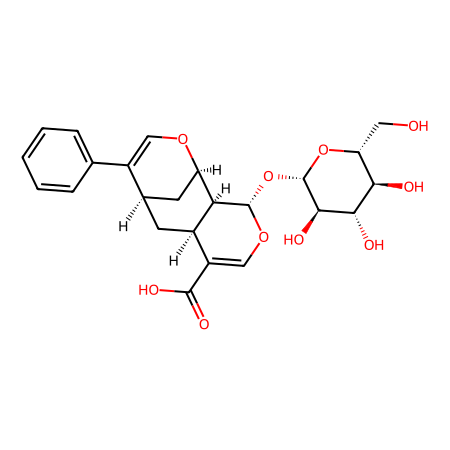

In [724]:
best_molecule

In [654]:
# Features of Loniphenyruviridoside A',

In [674]:
features_best_compound = best_compound[0][2]

# Next Step: designing a synthetic pathway. 

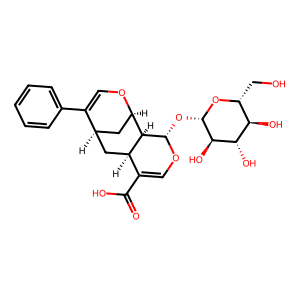

In [425]:
from rdkit import Chem
from rdkit.Chem import Draw
Draw.MolToImage(best_modlecule)

## Understanding the structure of this molecule

Mark the index on the atoms

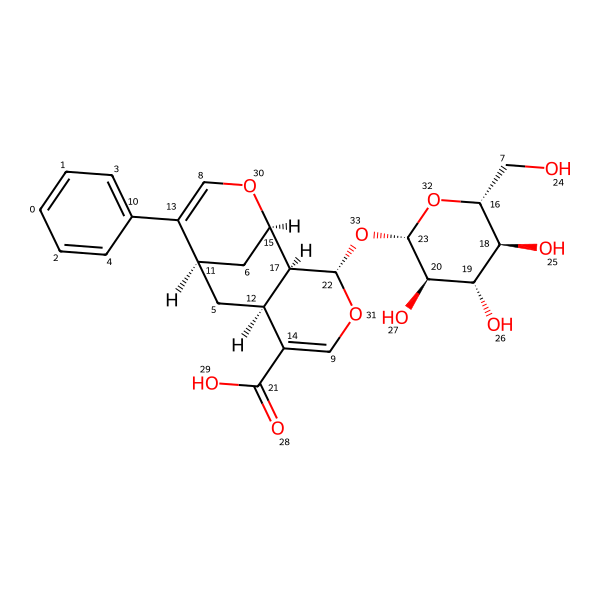

In [511]:
from rdkit import Chem
from rdkit.Chem import Draw

# Provided InChI string for Loniphenyruviridoside A
inchi_str = 'InChI=1S/C24H28O10/c25-8-17-19(26)20(27)21(28)24(33-17)34-23-18-13(15(10-32-23)22(29)30)6-12-7-16(18)31-9-14(12)11-4-2-1-3-5-11/h1-5,9-10,12-13,16-21,23-28H,6-8H2,(H,29,30)/t12-,13-,16-,17-,18+,19-,20+,21-,23+,24+/m1/s1'

# Convert InChI to molecule
molecule = Chem.MolFromInchi(inchi_str)

# Add atom indices to the molecule
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

# Draw the molecule with atom indices labeled
molecule_with_indices = Draw.MolToImage(molecule, size=(600, 600), kekulize=True)

# Display the image with atom indices
molecule_with_indices

In [512]:
Chem.MolToSmiles(molecule)

'O=C(O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1c1ccccc1'

chiral centers

Chiral Centers: [(11, 'R'), (12, 'S'), (15, 'R'), (16, 'R'), (17, 'S'), (18, 'S'), (19, 'S'), (20, 'R'), (22, 'S'), (23, 'S')]


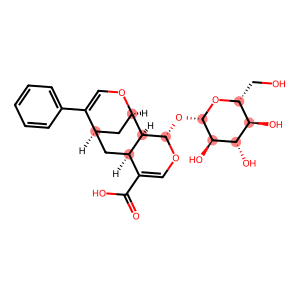

In [486]:
from rdkit.Chem import Draw
chiral_centers = Chem.FindMolChiralCenters(molecule, includeUnassigned=True)
print("Chiral Centers:", chiral_centers)

# Draw the molecule with chiral centers highlighted
Draw.MolToImage(molecule, highlightAtoms=[center[0] for center in chiral_centers])


Glycoside Moiety

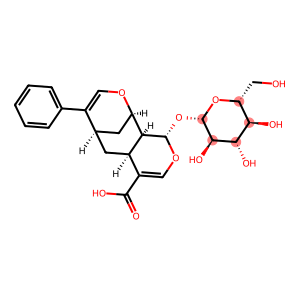

In [484]:
glycoside_atom_indices = [16, 18, 19, 20, 23]
Draw.MolToImage(molecule, highlightAtoms=glycoside_atom_indices)


phenyl group

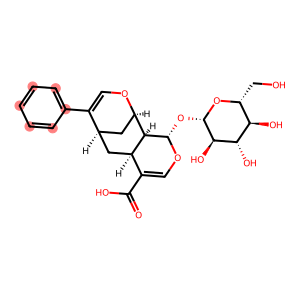

In [481]:
phenyl_atom_indices = [0,1,2,3,4,10]
Draw.MolToImage(molecule, highlightAtoms=phenyl_atom_indices)

Carboxyl Group (O-C-OH)

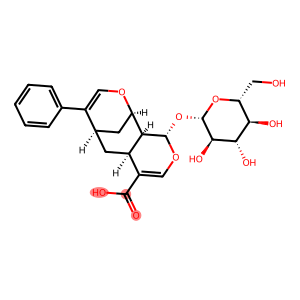

In [483]:
carboxyl_indices = [21,28,29] 
Draw.MolToImage(molecule, highlightAtoms=carboxyl_indices)


the last part -- I don't know what they are called. Not sure how to build this CORE part. It has 3 six-member rings. Two of them has a O. The middle are all C. 

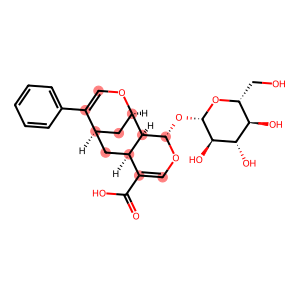

In [490]:
some_indices = [6,5, 8,9,11,12,13,14,15, 17,22] 
Draw.MolToImage(molecule, highlightAtoms=some_indices)

## Understanding smiles

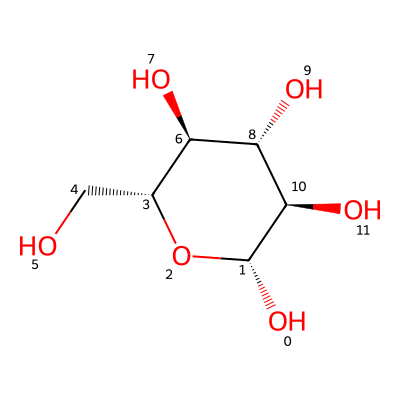

In [531]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the SMILES string
smiles_str = 'O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O'

# Convert SMILES to molecule
molecule = Chem.MolFromSmiles(smiles_str)

# Add atom indices to the molecule for visualization
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

# Draw the molecule with atom indices labeled
Draw.MolToImage(molecule, size=(400, 400))

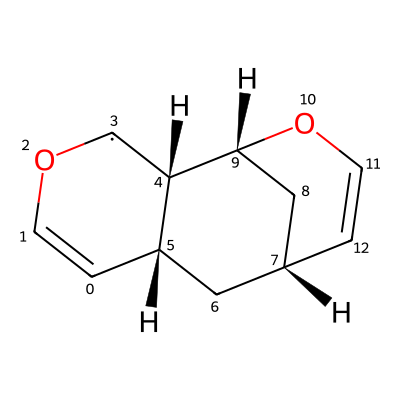

In [581]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define the SMILES string
#smiles_str = 'O=C(O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1c1ccccc1'


#O=C(O)
S1 = 'C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1c1ccccc1'
#c1ccccc1
S2 = 'C1=CO[C@@H](OO)[C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1'
#[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2
S3 = 'C1=CO[C@@H](OO)[C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1'
# (OO)
S4='C1=CO[C@@H][C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1'


smiles_str = 'C1=CO[C@@H][C@H]2[C@@H]1C[C@@H]1C[C@H]2OC=C1' 


# Convert SMILES to molecule
molecule = Chem.MolFromSmiles(smiles_str)

# Add atom indices to the molecule for visualization
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

# Draw the molecule with atom indices labeled
Draw.MolToImage(molecule, size=(400, 400))

Learning: https://www.masterorganicchemistry.com/2014/08/14/bridged-bicyclic-compounds-and-how-to-name-them/

There are 3 rings in this chain. A and B are "fused". B and C are "bridged" 
6-member rings with a O are called pyrans https://en.wikipedia.org/wiki/Pyran. There are two types of them: 2H-pyran and 4H-pyran. 2 and 4 refers to the position of H in relative to O. The counting is done clockwise.

And here is explanation on how to create SMILES for rings: https://www.daylight.com/meetings/summerschool98/course/dave/smiles-rings.html


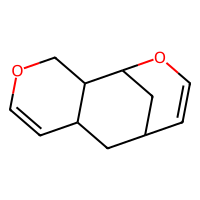

In [601]:
# remove all H
Draw.MolToImage(Chem.MolFromSmiles('C1=COCC2C1CC1CC2OC=C1'), size=(200, 200))

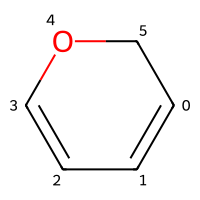

In [726]:
# 2H-Pyran
molecule = Chem.MolFromSmiles('C1=CC=COC1')

# Add atom indices to the molecule for visualization
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

Draw.MolToImage(molecule, size=(200, 200))

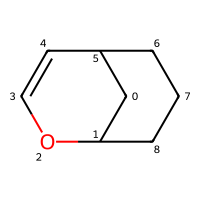

In [633]:
# I created this smiles myself -- not sure I followed all the rules
molecule = Chem.MolFromSmiles('C1C2OC=CC1CCC2')

# Add atom indices to the molecule for visualization
for atom in molecule.GetAtoms():
    atom.SetProp('atomNote', str(atom.GetIdx()))

Draw.MolToImage(molecule, size=(200, 200))

If we can fuse 7-8 in this 2-ring structure with the 0-1 in 2H-Pyran -- we get the 3 ring 

# Synthesizing 

I guess the most difficult part is the core: the 3 six-member ring chain. Here is my roughly thoughts
1. Take Pyran P1. Add two 2C arms to it. 
2. Take another pyran P2. Connect with 1. These will form the 3 six-member ring chain
3. add phenyl, carboxyl, Glycoside Moiety



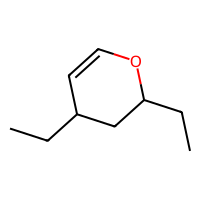

In [730]:
# can be above structure be formed from Pyran by
# 1. adding two 2C arms
# 2. connecting the two arms to form a cycle?
molecule = Chem.MolFromSmiles('C1C(CC)C=COC(CC)1')

Draw.MolToImage(molecule, size=(200, 200))

# Visualizing the known effective medicines 

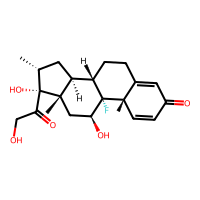

In [732]:
mol = getRdkitMoleculeFromPubChemCompound(positive_compounds[0])
Draw.MolToImage(mol, size=(200, 200))

## How the model work on the training data itself


In [851]:
X_positive_pred = pd.DataFrame(positive_features)
Y_positive_pred = model.predict_proba(X_positive_pred)
Y_positive_pred


array([[0.0375, 0.9625],
       [0.1625, 0.8375],
       [0.11  , 0.89  ],
       [0.33  , 0.67  ],
       [0.2725, 0.7275],
       [0.3   , 0.7   ],
       [0.225 , 0.775 ],
       [0.465 , 0.535 ],
       [0.0525, 0.9475],
       [0.0525, 0.9475],
       [0.0525, 0.9475],
       [0.375 , 0.625 ],
       [0.3675, 0.6325],
       [0.7275, 0.2725],
       [0.375 , 0.625 ],
       [0.255 , 0.745 ],
       [0.1775, 0.8225],
       [0.155 , 0.845 ],
       [0.1975, 0.8025],
       [0.0575, 0.9425],
       [0.2325, 0.7675],
       [0.2375, 0.7625],
       [0.1675, 0.8325],
       [0.08  , 0.92  ],
       [0.0675, 0.9325],
       [0.5075, 0.4925],
       [0.605 , 0.395 ],
       [0.1525, 0.8475],
       [0.3225, 0.6775],
       [0.07  , 0.93  ],
       [0.2   , 0.8   ],
       [0.145 , 0.855 ],
       [0.045 , 0.955 ],
       [0.2825, 0.7175],
       [0.14  , 0.86  ],
       [0.215 , 0.785 ],
       [0.1625, 0.8375]])

## In the images of positive compounds, I also include something called ATC code - a classification of how the medecine works on the acne.
I can see the following classes:

corticosteroids

antiinfectives 

retinoid

peroxides

other anti-acne prep for topical use

compounds containing S

other compounds that I cannot find ATC code 



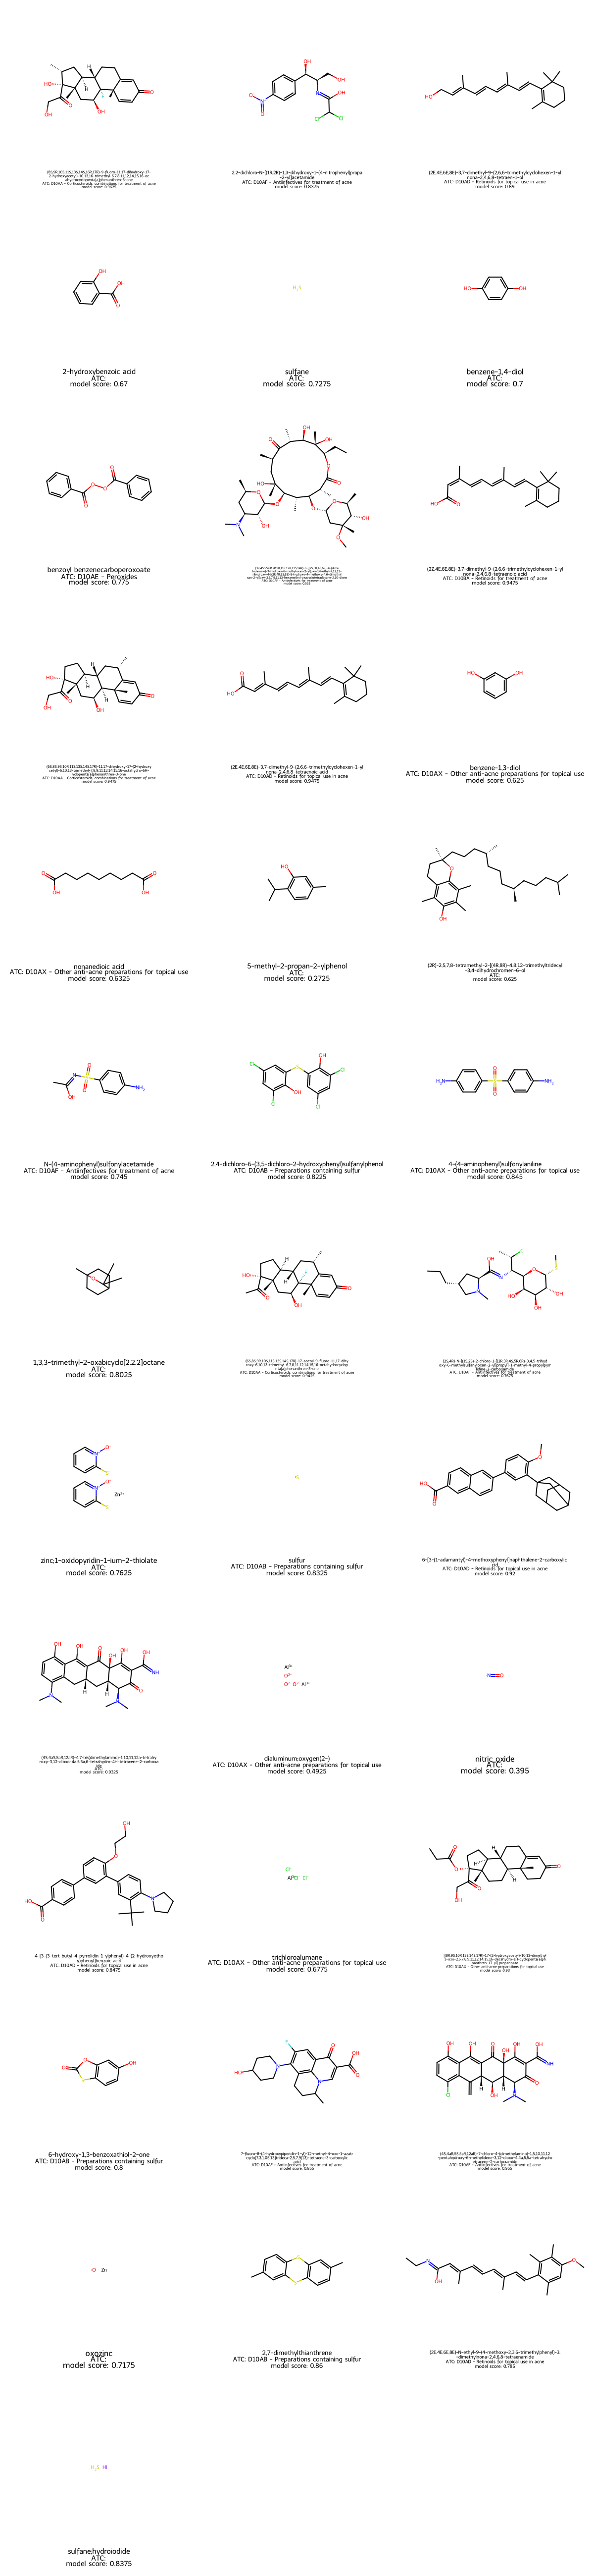

In [859]:
from rdkit import Chem
from rdkit.Chem import Draw

# Lengend is a combination of iupc name and atc code. Break them into multiple lines for drawing 
# I could not find atc code for all of them. 
def genLegend(c):
    # c is a tuple <compound, level4AtcCode>
    return c[0].iupac_name[0:60] + "\n" + c[0].iupac_name[61:120] + "\n" + c[0].iupac_name[121:180] + "\n" + c[0].iupac_name[181:] + "\n" \
        + "ATC: "  + c[1] + "\n" + "model score: " + str(c[2][1])
    

names = [genLegend(c) for c in zip(positive_compounds, positive_atc_codes_level4, Y_positive_pred)]
#names = [c.synonyms for c in positive_compounds]
molecules = [getRdkitMoleculeFromPubChemCompound(c) for c in positive_compounds]
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(400, 400), legends=names)
img
             

## The PubChem has something called ATC code -- looks like a classification of their usage
The Anatomical Therapeutic Chemical code: a unique code assigned to a medicine according to the organ or system it works on and how it works.


In [824]:
import pubchempy as pcp
import requests
import json

def getAtcCodeFromString(str):
    return str.split(" ")[0]

def get_compound_details(comp):
    cid = comp.cid
    # Define the URL for the PubChem API
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{cid}/JSON/"
    
    # Make a request to the PubChem API
    response = requests.get(url)
    
    print(response.json)
    
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Extract the ATC code(s) from the JSON data
        atc_codes = []
        sections = data['Record']['Section']
        for section in sections:
            if section['TOCHeading'] in ['Pharmacology and Biochemistry', 'Therapeutic Uses']:
                for subsection in section['Section']:
                    if subsection['TOCHeading'] == 'ATC Code':
                        for information in subsection['Information']:
                            if 'acne' in json.dumps(information).lower(): 
                                #print(information['Value']['StringWithMarkup'])
                                for entry in information['Value']['StringWithMarkup']:
                                    atc_codes.append(entry['String'])
        
        return atc_codes
    else:
        return None


In [825]:
positive_atc_codes = [get_compound_details(comp) for comp in positive_compounds]


<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Response.json of <Response [200]>>
<bound method Respon

## All ATC code I can find are all under D10A -- 'Anti-acne preparations for topical use'. I don't see antibiotic.
Use level4 for in the legend-name for drawing. I can also include level5.


In [828]:
positive_atc_codes[0:5]

[['D - Dermatologicals',
  'D10 - Anti-acne preparations',
  'D10A - Anti-acne preparations for topical use',
  'D10AA - Corticosteroids, combinations for treatment of acne',
  'D10AA03 - Dexamethasone'],
 ['D - Dermatologicals',
  'D10 - Anti-acne preparations',
  'D10A - Anti-acne preparations for topical use',
  'D10AF - Antiinfectives for treatment of acne',
  'D10AF03 - Chloramphenicol'],
 ['D - Dermatologicals',
  'D10 - Anti-acne preparations',
  'D10A - Anti-acne preparations for topical use',
  'D10AD - Retinoids for topical use in acne',
  'D10AD02 - Retinol'],
 [],
 []]

In [829]:
positive_atc_codes_level4 = [codes[3] if len(codes) >=4 else "" for codes in positive_atc_codes]

# Visualize the compounds in the Herb

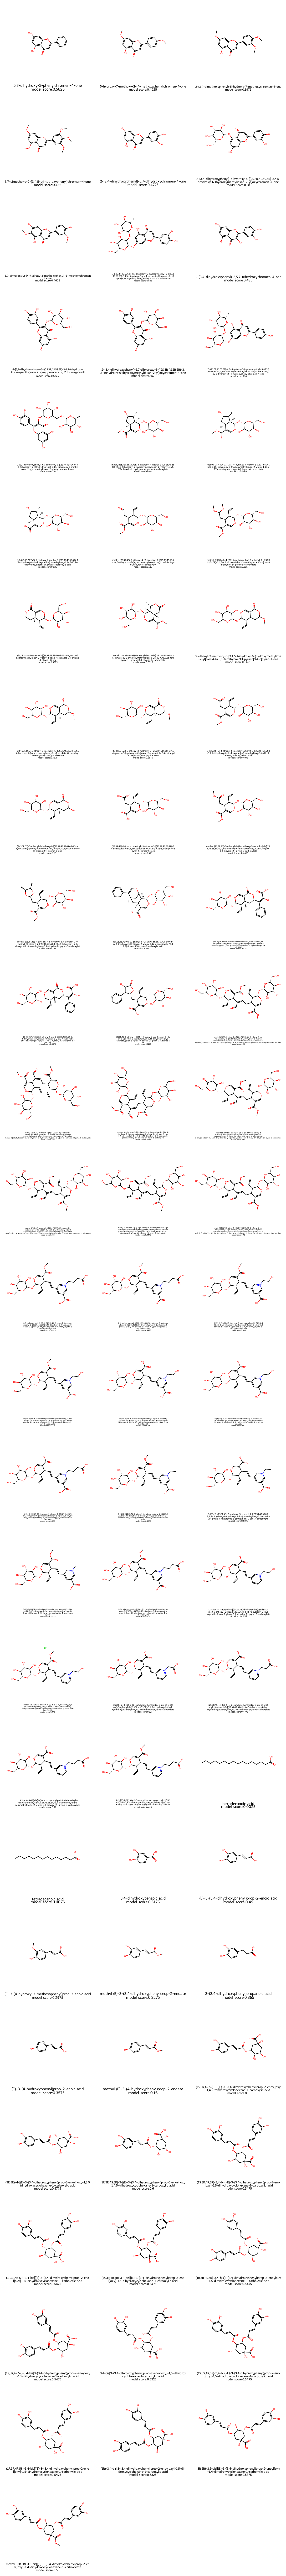

In [862]:
prediction_compounds

from rdkit import Chem
from rdkit.Chem import Draw

# Lengend is a combination of iupc name and atc code. Break them into multiple lines for drawing 
# I could not find atc code for all of them. 
def genLegend_prediction(c):
    # c is a tuple <compound, level4AtcCode>
    return c[0].iupac_name[0:60] + "\n" + c[0].iupac_name[61:120] + "\n" + c[0].iupac_name[121:180] + "\n" + c[0].iupac_name[181:] + "\n" + "model score:" + str(c[1][1])
    

names = [genLegend_prediction(c) for c in zip(prediction_compounds, Y_pred)]
#names = [c.synonyms for c in positive_compounds]
molecules = [getRdkitMoleculeFromPubChemCompound(c) for c in prediction_compounds]
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(400, 400), legends=names, maxMols=len(names))
img


# Writing Papers

### Example papers

In [ ]:
https://www.rsc.org/suppdata/d4/ra/d4ra02159b/d4ra02159b1.pdf